<img src='logo.PNG' width="900" height="400" align="left">

# Capstone IBM - Forecasting Air Pollution particulate Matter (PM2.5) in the City of London

## Objectives

Objectives of this Capstone are.

-   Apply all knowledge learned in this certificate to a real case.
-   Apply machine learning techniques.

## Table of contents

    
* [1. Introduction: Problem](#introduction)
* [2. Data description](#data)
* [3. Methodology](#methodology)
* [4. Results and Discussion](#results)
* [5. Conclusion](#conclusion)


## 1. Introduction: Problem <a name="introduction"></a>

Air pollution forecasting is a worthwhile investment on multiple levels - individual, community, national and global. Accurate forecasting helps people plan ahead, decreasing the effects on health and the costs associated.

In this capstone, machine lerning predictive model to forecasting particular matter concentration in atmospheric air are investigated on Air London Quality Network data sets, which were obtained from 2019 to 2020. Lineal regression model was used with different stations around London and compare models and performance in each station.

If people are aware of variations in the quality of the air they breathe, the effect of pollutants on health as well as concentrations likely to cause adverse effects and actions to curtail pollution. Furthermore, there is a greater likelihood of motivating changes in both individual behaviour and public policy, as people want air quality information.

## 2. Data description <a name="data"></a>

Based on the definition of our problem, factors that will influence our decision are:
* Existing stations in the United Kingdom with values such as code of station, date (date and hour), Oxides of Nitrogen ($NO_{x}$), Nitrogen Dioxide($NO_{2}$), Nitric Oxide($NO$), Particulate Matter($PM_{10}$), wind speed (ws), wind direction (wd), air temperature.
* Stations in Greater of London with records from 2019 to 2020. 
* Stations with the percentage of non-missing for Particulate Matter($PM_{2.5}$) larger than 80%.

Following data sources will be needed to extract/generate the required information from R package **Openair**. 
* UK National Network
* Air Quality England Network
* The London Air Quality Network

### 2.1 Download data

Information of all stations with particular and chronological data download with packed R Openair. [Download Jupyter in R](https://github.com/mirelmora/Coursera_Applied_Data_Science_Capstone/blob/main/Capstone/Jupyter/R/data_downloader_R.ipynb) 

### 2.2 Stations Candidates 

####  Importing Needed packages

In [119]:
import pandas as pd 
import pandas as pd # library for data analsysis
from geopy.geocoders import Nominatim
import folium 
import numpy as np
import datetime as dt
from sklearn.neighbors import DistanceMetric
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [80]:
# London location
address = 'London, UK'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of UK are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of UK are 51.5073219, -0.1276474.


Read the information that download from Openair.

In [68]:
df_location_uk = pd.read_csv('data/uk_locations.csv')
df_location_england = pd.read_csv('data/england_locations.csv')
df_location_london = pd.read_csv('data/london_locations.csv')

In [69]:
df_all_location_p = pd.concat([df_location_uk, df_location_england, df_location_london], sort=False)
df_all_location_p = df_all_location_p.drop(['Unnamed: 0', 'site', 'site_type'], axis=1)
df_all_location_plot = df_all_location_p.dropna()
df_all_location_p.head()

code   latitude  longitude
0   ABD  57.157360  -2.094278
1  ABD7  57.144555  -2.106472
2  ABD8  57.133888  -2.094198
3  ARM6  54.353728  -6.654558
4    AH  52.503850  -3.034178

#### All station from the data.

In [70]:
# Create map of London using latitude and longitude values
map_uk_all = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat, lng, code in zip(df_all_location_plot['latitude'], df_all_location_plot['longitude'], df_all_location_plot['code']):
    label = '{}'.format(code)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_uk_all)

map_uk_all

#### Select stations around Greater of London. 

In [75]:
#  Station in Greater London
cond_1 = (df_all_location_p['latitude'] < 51.70) & (df_all_location_p['latitude'] > 51.20)
cond_2 = (df_all_location_p['longitude'] > - 0.55) & (df_all_location_p['longitude'] < 0.20)
df_all_location_v1 = df_all_location_p[cond_1 & cond_2]
#df_all_location_v2 = df_all_location_v1.drop('Unnamed: 0', axis=1)
df_all_location_list = (df_all_location_p['code'].to_list())

In [74]:
df_all_locations = pd.read_csv('data/1_df_all_locations.csv')

In [82]:
# Create map of London using latitude and longitude values
map_london_all = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat, lng, code in zip(df_all_locations['latitude'], df_all_locations['longitude'], df_all_locations['code']):
    label = '{}'.format(code)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london_all)

map_london_all

#### Select stations that have percentage of non-missing $PM_{2.5}$ larger than  80%

In [85]:
df_all_stations = pd.read_csv('data/2_df_all_stations_v5.csv')
df_all_stations

Unnamed: 0   code                 date       nox       no2        no  \
0           523117    CA1  2019-01-01 00:00:00  19.99255  16.64913   2.18053   
1           523118    CA1  2019-01-01 01:00:00  23.06195  18.44484   3.01120   
2           523119    CA1  2019-01-01 02:00:00  14.55889  12.23044   1.51858   
3           523120    CA1  2019-01-01 03:00:00  11.69689   9.90577   1.16814   
4           523121    CA1  2019-01-01 04:00:00  12.56793  10.83652   1.12920   
...            ...    ...                  ...       ...       ...       ...   
532992     2201318  HB004  2020-12-31 19:00:00  58.60403  34.47509  15.73649   
532993     2201319  HB004  2020-12-31 20:00:00  57.61777  33.76286  15.55777   
532994     2201320  HB004  2020-12-31 21:00:00  51.98048  30.00061  14.33490   
532995     2201321  HB004  2020-12-31 22:00:00  42.91892  26.44317  10.74520   
532996     2201322  HB004  2020-12-31 23:00:00  46.87381  28.05274  12.27479   

        o3  pm10  pm2.5   ws     wd  air_temp  
0      NaN  39.7   35.5  2.3  259.3       5.5  
1      NaN  15.9    9.2  2.6  269.4       4.6  
2      NaN  11.5    4.5  3.0  280.5       4.4  
3      NaN  10.9    4.3  2.7  287.0       4.1  
4      NaN  12.2    5.3  3.0  291.5       4.0  
...     ..   ...    ...  ...    ...       ...  
532992 NaN  15.7   14.1  NaN    NaN       NaN  
532993 NaN  19.2   16.7  NaN    NaN       NaN  
532994 NaN  22.2   19.6  NaN    NaN       NaN  
532995 NaN  20.7   18.7  NaN    NaN       NaN  
532996 NaN  23.2   21.2  NaN    NaN       NaN  

[532997 rows x 12 columns]

In [95]:
df_all_stations_v1 = df_all_stations.drop(['Unnamed: 0'], axis=1)
# Percentage of missing values per column
percent_missing = df_all_stations_v1.isnull().sum(axis=0) * 100 / len(df_all_stations_v1)

In [96]:
# Group by station
grouped_station = df_all_stations_v1.groupby('code')
grouped_station_m = (grouped_station.apply(lambda x: x.isnull().mean())*100)
# List station with more than 90% of PM2.5
final_station = grouped_station_m[grouped_station_m['pm2.5'] > 90].index
# Drop final station
station_drop = final_station.tolist()

In [97]:
# Create final dataframe
df_final_location = df_all_locations.drop(['Unnamed: 0', 'site', 'site_type'], axis=1)
df_final_locations_v1 = df_final_location[df_final_location['code'].isin(stations_list_total)]
df_final_locations_v2 = df_final_locations_v1.drop_duplicates(['code'])

In [98]:
# Create map of London using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat, lng, code in zip(df_final_locations_v2['latitude'], df_final_locations_v2['longitude'], df_final_locations_v2['code']):
    label = '{}'.format(code)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)

map_london

## 2.3 Data Cleaning 

The process for data cleaning is the following:
Download the pollution details of al stations. Warning in this case, it can run this file because github cannot afford this size of files. 

In [115]:
# Create a dataframe with information
df_uk = pd.read_csv('data/df_uk.csv')
df_england = pd.read_csv('data/df_england.csv')
df_london = pd.read_csv('data/df_london.csv')
df_all_locations = pd.read_csv('data/1_df_all_locations.csv')
df_all_stations = pd.concat([df_uk, df_england, df_london], sort=False)

In [121]:
df_all_stations['date'] = pd.to_datetime(df_all_stations['date'], format='%Y%m%d %H:%M:%S')
df_all_stations = df_all_stations.drop_duplicates(['date', 'code'])

In [116]:
# Create final dataframe
df_final_location = df_all_locations.drop(['Unnamed: 0', 'site', 'site_type'], axis=1)
df_final_locations_v1 = df_final_location[df_final_location['code'].isin(stations_list_total)]
df_final_locations_v2 = df_final_locations_v1.drop_duplicates(['code'])
# Convert the LAt/Long degress in radians
df_final_locations_v3 = df_final_locations_v2.copy()
df_final_locations_v3['latitude'] = np.radians(df_final_locations_v2['latitude'])
df_final_locations_v3['longitude'] = np.radians(df_final_locations_v2['longitude'])

In [117]:
percent_missing = df_all_stations.isnull().sum(axis=0) * 100 / len(df_all_stations)

In [122]:
df_all_stations = df_all_stations[(df_all_stations['date'] >= dt.datetime(2019, 1, 1)) &
                                  (df_all_stations['date'] <= dt.datetime(2020, 12, 31))]

### Remove duplicate values

In [123]:
df_all_stations = df_all_stations.drop_duplicates(['date', 'code'])

### Spatial Interpolation

The missing values are calculated with a **spatial interpolation**. 

Firstly, it is calculated the distance matrix with the library **sklearn.neighbors**.It is used the metrics intended for two-dimensional vector spaces called haversine. The haversine determines the great-circle distance between two points on a sphere given their longitudes and latitudes.

<img src='circle.png' width="400" height="400" align="center">

In [124]:
# Vector spaces
dist = DistanceMetric.get_metric('haversine')
# Create matrix
matrix = df_final_locations_v3[['latitude', 'longitude']].to_numpy()
# Distance matrix plus 6373 in km
matrix_km = dist.pairwise(df_final_locations_v3[['latitude', 'longitude']].to_numpy())*6373
# Row and cell of the stations
distance_stations = pd.DataFrame(matrix_km, columns=df_final_locations_v2.code.unique(),
                                 index=df_final_locations_v2.code.unique())
distance_stations

CA1        BEX       CLL2       LON6        HRL        HP1  \
CA1      0.000000  26.402687   4.197422  19.852504  19.438916  14.201798   
BEX     26.402687   0.000000  22.407491   8.043775  43.469840  15.508575   
CLL2     4.197422  22.407491   0.000000  15.672965  22.174139  10.138492   
LON6    19.852504   8.043775  15.672965   0.000000  35.728797   7.505891   
HRL     19.438916  43.469840  22.174139  35.728797   0.000000  28.342217   
HP1     14.201798  15.508575  10.138492   7.505891  28.342217   0.000000   
MY1      2.803251  24.330541   1.987976  17.441444  20.221536  11.469935   
KC1      3.692005  28.253655   6.064508  21.110001  16.196443  14.552115   
TED2    17.725136  37.048811  18.658525  29.028278   9.704133  21.540351   
HORS     6.273828  22.171057   3.100512  14.803117  21.456977   8.241905   
CD009    3.689065  22.781307   0.663112  16.164999  22.091944  10.765116   
HF5      6.676800  28.528517   7.597023  20.957508  15.022903  13.835882   
LHRBR   19.760380  43.465060  22.368664  35.678205   0.859221  28.258390   
T55     22.657527  46.553150  25.389669  38.759773   3.225367  31.331332   
LHR2    19.738028  43.351971  22.309598  35.554690   1.072870  28.127866   
T54     23.075035  46.037398  25.464081  38.142062   4.186156  30.656580   
HB014   14.593785  38.254118  18.413593  33.110452  22.534838  28.533015   
HB009   14.182626  37.665457  17.953082  32.566883  22.718757  28.059505   
HIL4    21.978374  46.080004  24.782135  38.320907   2.624319  30.916513   
HS5     11.146391  34.382140  13.266659  26.703330   9.110063  19.402203   
HS4      8.079096  30.764229   9.678956  23.156208  12.774938  15.959175   
NEW2    11.999765  15.195848   8.730802  10.719805  30.902039  10.080337   
NEW3    13.538441  12.975720   9.756963   7.933754  31.716288   8.081938   
SSE009  24.275275  48.220815  27.048555  40.419655   4.874757  32.984350   
SSE007  24.144965  48.119640  26.927767  40.323386   4.753667  32.891308   
SLH6    24.241522  48.193925  27.017001  40.393941   4.843025  32.959407   
SLH5    24.008875  48.075085  26.825318  40.292328   4.659232  32.869076   
SLH9    23.514699  47.686647  26.366441  39.923152   4.229309  32.513373   
SBC01   21.771852  42.136066  23.235489  34.116126   7.789991  26.627502   
TH004   11.992671  14.450030   8.170445   8.852068  30.135979   7.543694   
TH2P     9.520808  16.927092   5.795136  11.032004  27.909419   8.110400   
TH002    9.829197  17.225097   6.719383  12.149663  28.842679  10.108684   
WL1     11.955055  16.949292   9.483444  13.288601  31.310883  12.736403   
HB004   20.269019  45.966192  24.459102  40.013226  19.143038  34.379018   

              MY1        KC1       TED2       HORS  ...     SSE007       SLH6  \
CA1      2.803251   3.692005  17.725136   6.273828  ...  24.144965  24.241522   
BEX     24.330541  28.253655  37.048811  22.171057  ...  48.119640  48.193925   
CLL2     1.987976   6.064508  18.658525   3.100512  ...  26.927767  27.017001   
LON6    17.441444  21.110001  29.028278  14.803117  ...  40.323386  40.393941   
HRL     20.221536  16.196443   9.704133  21.456977  ...   4.753667   4.843025   
HP1     11.469935  14.552115  21.540351   8.241905  ...  32.891308  32.959407   
MY1      0.000000   4.078424  17.090744   3.473934  ...  24.974262  25.064417   
KC1      4.078424   0.000000  14.044321   6.363381  ...  20.943834  21.035707   
TED2    17.090744  14.044321   0.000000  16.698707  ...  12.964357  12.993651   
HORS     3.473934   6.363381  16.698707   0.000000  ...  26.175780  26.257097   
CD009    1.887808   5.913287  18.870944   3.710950  ...  26.843321  26.934119   
HF5      5.883543   3.249416  11.239682   6.434196  ...  19.743141  19.824955   
LHRBR   20.432213  16.441182   9.122919  21.535117  ...   4.655342   4.731639   
T55     23.440851  19.420628  11.604865  24.613435  ...   1.566718   1.644269   
LHR2    20.378108  16.398039   8.901316  21.445431  ...   4.769580   4.842297   
T54     23.565542  19.652386  10.026678  24.391412  ...  

### Create a function to spacial interpolation

In [ ]:
def get_dic_stations(distances_matrix_df: pd.DataFrame) -> dict:

    list_of_stations = distances_matrix_df.columns.to_list()
    dico = {}
    for station in list_of_stations:
        list_tuples = sorted(distances_matrix_df[station].to_dict().items(), key=lambda x: x[1])
        dico[station] = [k for k, v in list_tuples]

    return dico

dico = get_dic_stations(distance_stations)
dico

Interpolation spacial is a big process. So, it is better to run in Pycharm.

In [ ]:
# Interpolation
list_columns = ['nox', 'no2', 'no', 'pm10', 'pm2.5', 'ws', 'wd','air_temp']

cols = ['date', 'code']
cols.extend(list_columns)
df_aux = df_all_stations[cols].copy()

k = 9
for var in list_columns:
    df_nan = df_aux[df_aux[var].isna()]
    for i, row in df_nan.iterrows():
        date = row.date
        station = row.code
        l_station = dico[station][1:k+1]

        v_values = []
        v_rows = df_aux.loc[(df_aux['date'] == date) & (df_aux['code'].isin(l_station))]
        the_mean = np.nanmean(v_rows[var].values)

        #the_mean = np.nanmean(v_values)
        #print('Interpolated value {} for date={} as station={} (length={} out of {})'.format(the_mean, date, station, v_rows.shape[0], len(l_station)))
        df_aux.loc[(df_aux['date'] == date) & (df_aux['code'] == station), var] = the_mean
        # insert the_mean into df_all_stations

percent_missing = df_aux.isnull().sum(axis=0) * 100 / len(df_aux)
percent_missing_all = df_all_stations.isnull().sum(axis=0) * 100 / len(df_all_stations)

#### Fill NaN

In [126]:
df_stations_2020 = pd.read_csv('data/4a_df_stations_2020.csv')
df_stations_2020.head()

Unnamed: 0                 date code         nox        no2         no  \
0        8760  2020-01-01 00:00:00  CA1  119.609089  49.081484  45.996906   
1        8761  2020-01-01 01:00:00  CA1  136.583502  49.842824  56.570796   
2        8762  2020-01-01 02:00:00  CA1  117.663934  46.335704  46.519061   
3        8763  2020-01-01 03:00:00  CA1   95.205475  41.252428  35.187260   
4        8764  2020-01-01 04:00:00  CA1   77.976193  37.098055  26.660030   

   pm10  pm2.5   ws     wd  air_temp  
0  43.6   36.3  2.1   92.7       2.3  
1  45.9   39.5  2.1   98.3       1.4  
2  65.6   57.8  2.3  116.6       1.0  
3  53.0   46.2  1.8  131.1       0.8  
4  43.5   39.0  1.7  108.8       0.8

After interpolation there are some missing values but clean this data.

In [127]:
df_stations_2020 = df_stations_2020.drop('Unnamed: 0', axis=1)
df_stations_2020['date'] = pd.to_datetime(df_stations_2020['date'], format='%Y%m%d %H:%M:%S')
percent_missing_2020 = df_stations_2020.isnull().sum(axis=0) * 100 / len(df_stations_2020)
percent_missing_2020

date        0.000000
code        0.000000
nox         0.000376
no2         0.000000
no          0.000000
pm10        0.000000
pm2.5       0.000000
ws          3.634485
wd          3.634485
air_temp    3.634485
dtype: float64

In [128]:
df_stations_2020 = df_stations_2020.fillna(method='backfill', limit=2)
percent_missing_2020 = df_stations_2020.isnull().sum(axis=0) * 100 / len(df_stations_2020)
df_stations_2020 = df_stations_2020.dropna()
percent_missing_2020 = df_stations_2020.isnull().sum(axis=0) * 100 / len(df_stations_2020)
percent_missing_2020 

date        0.0
code        0.0
nox         0.0
no2         0.0
no          0.0
pm10        0.0
pm2.5       0.0
ws          0.0
wd          0.0
air_temp    0.0
dtype: float64

In [129]:
df_stations_2019 = pd.read_csv('data/4a_df_stations_2019.csv')
df_stations_2019.head()

Unnamed: 0                 date code       nox       no2       no  pm10  \
0           0  2019-01-01 00:00:00  CA1  19.99255  16.64913  2.18053  39.7   
1           1  2019-01-01 01:00:00  CA1  23.06195  18.44484  3.01120  15.9   
2           2  2019-01-01 02:00:00  CA1  14.55889  12.23044  1.51858  11.5   
3           3  2019-01-01 03:00:00  CA1  11.69689   9.90577  1.16814  10.9   
4           4  2019-01-01 04:00:00  CA1  12.56793  10.83652  1.12920  12.2   

   pm2.5   ws     wd  air_temp  
0   35.5  2.3  259.3       5.5  
1    9.2  2.6  269.4       4.6  
2    4.5  3.0  280.5       4.4  
3    4.3  2.7  287.0       4.1  
4    5.3  3.0  291.5       4.0

In [130]:
df_stations_2019 = df_stations_2019.drop('Unnamed: 0', axis=1)
df_stations_2019['date'] = pd.to_datetime(df_stations_2019['date'], format='%Y%m%d %H:%M:%S')
percent_missing_2019 = df_stations_2019.isnull().sum(axis=0) * 100 / len(df_stations_2019)
percent_missing_2019

date        0.000000
code        0.000000
nox         0.000000
no2         0.000000
no          0.000000
pm10        0.000000
pm2.5       0.000000
ws          4.871158
wd          4.871158
air_temp    4.871158
dtype: float64

In [131]:
df_stations = pd.concat([df_stations_2019, df_stations_2020], sort=False)
df_stations_2019 = df_stations_2019.fillna(method='backfill', limit=10)
percent_missing_2019 = df_stations_2019.isnull().sum(axis=0) * 100 / len(df_stations_2019)
df_stations_2019 = df_stations_2019.dropna()
percent_missing_2019 = df_stations_2019.isnull().sum(axis=0) * 100 / len(df_stations_2019)
percent_missing_2019

date        0.0
code        0.0
nox         0.0
no2         0.0
no          0.0
pm10        0.0
pm2.5       0.0
ws          0.0
wd          0.0
air_temp    0.0
dtype: float64

# 3 Methodology <a name="methodology"></a>

## 3.1 Model

Forecast the air pollution, we utilized machine learning strategy, such as linear regression. The proposed architecture is showing in the figure of the prediction model for air pollution.

<img src='Architecture.PNG' width="800" height="500" align="center">

Create group for create differents plots

In [132]:
# Create group
grouped_station_2019 = df_stations_2019.groupby('code')
grouped_station_2020 = df_stations_2020.groupby('code')
grouped_station = df_stations.groupby('code')

Total of data for each station

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'SSE009'),
  Text(1, 0, 'LHRBR'),
  Text(2, 0, 'SSE007'),
  Text(3, 0, 'SLH5'),
  Text(4, 0, 'SLH6'),
  Text(5, 0, 'T55'),
  Text(6, 0, 'TH2P'),
  Text(7, 0, 'HF5'),
  Text(8, 0, 'SLH9'),
  Text(9, 0, 'HB014'),
  Text(10, 0, 'HIL4'),
  Text(11, 0, 'HB004'),
  Text(12, 0, 'NEW2'),
  Text(13, 0, 'HS5'),
  Text(14, 0, 'HB009'),
  Text(15, 0, 'T54'),
  Text(16, 0, 'WL1'),
  Text(17, 0, 'SBC01'),
  Text(18, 0, 'LHR2'),
  Text(19, 0, 'TH004'),
  Text(20, 0, 'LON6'),
  Text(21, 0, 'TH002'),
  Text(22, 0, 'TED2'),
  Text(23, 0, 'CA1'),
  Text(24, 0, 'CD009'),
  Text(25, 0, 'CLL2'),
  Text(26, 0, 'HORS'),
  Text(27, 0, 'HRL'),
  Text(28, 0, 'HS4'),
  Text(29, 0, 'NEW3'),
  Text(30, 0, 'KC1'),
  Text(31, 0, 'MY1'),
  Text(32, 0, 'HP1'),
  Text(33, 0, 'BEX')])

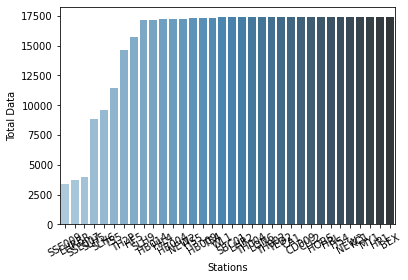

In [133]:
result_ = df_stations.groupby(['code']).size()
result = result_.sort_values(ascending=True)
stations = result.index
total_data = result.values

# plot the result
ax = sns.barplot(x=stations, y=total_data, palette="Blues_d")
ax.set(xlabel='Stations', ylabel='Total Data')
plt.xticks(rotation=30)

## 3.2 Looking at data: scatter diagrams

Scatter plot for each station between $PM_{2.5}$ and all vaues

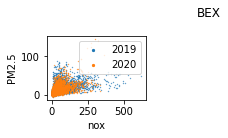

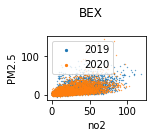

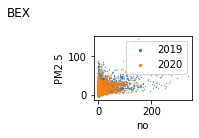

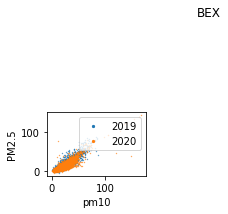

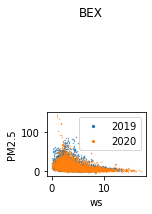

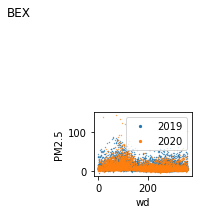

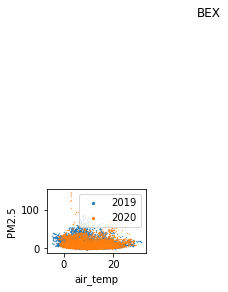

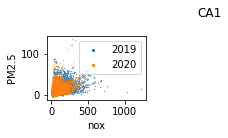

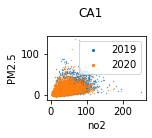

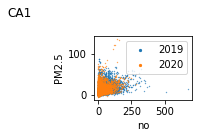

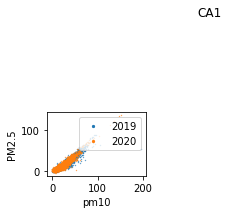

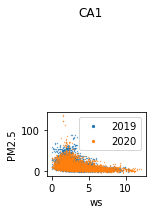

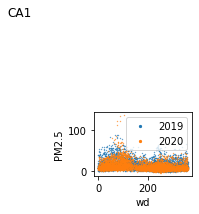

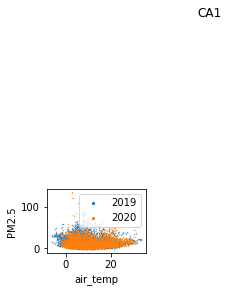

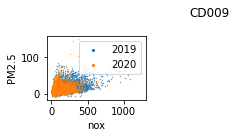

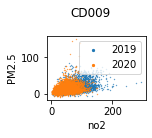

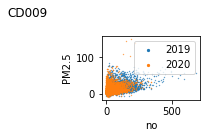

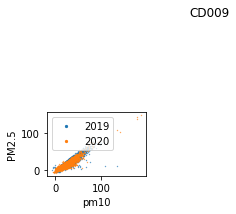

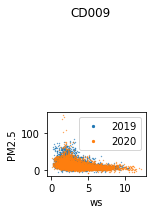

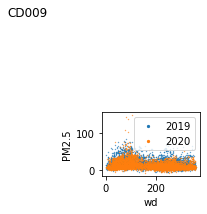

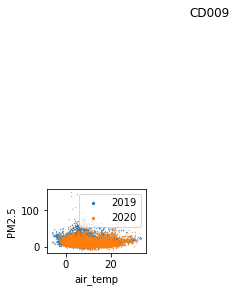

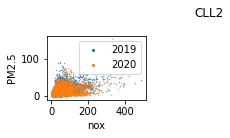

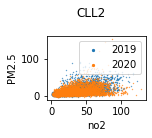

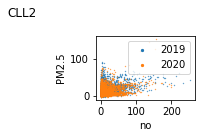

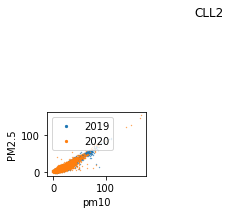

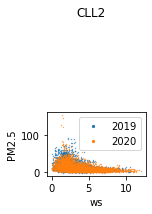

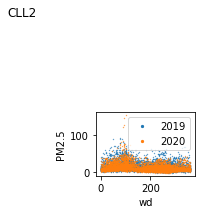

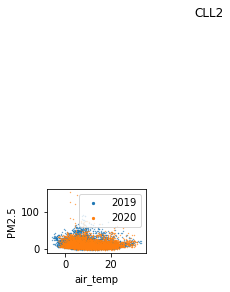

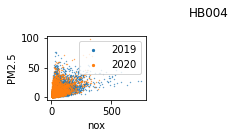

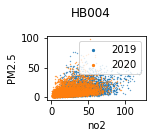

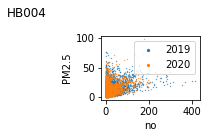

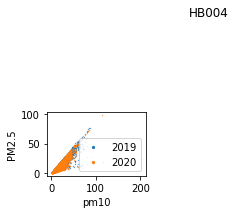

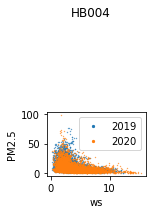

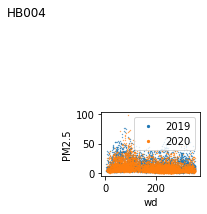

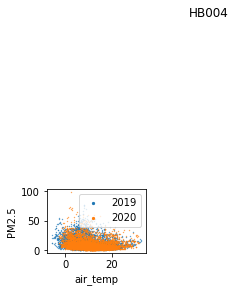

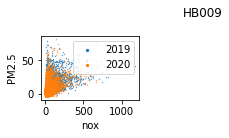

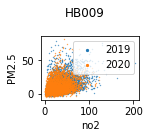

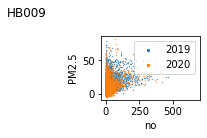

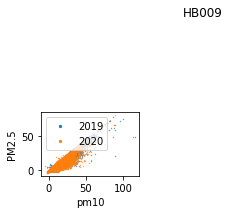

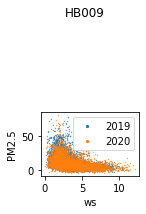

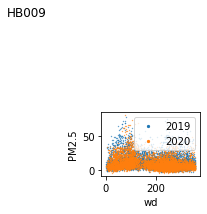

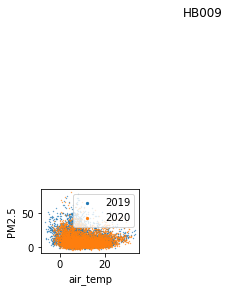

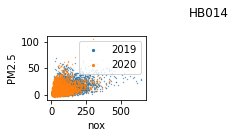

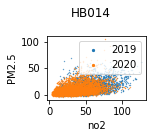

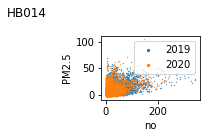

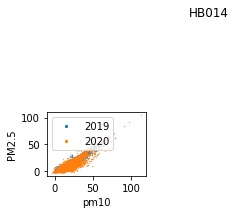

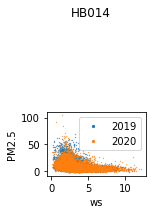

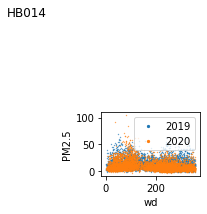

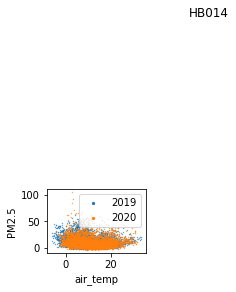

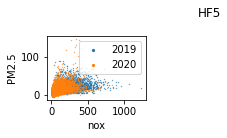

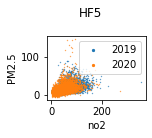

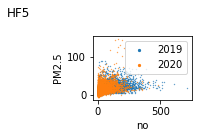

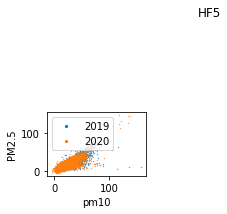

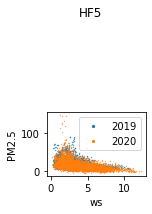

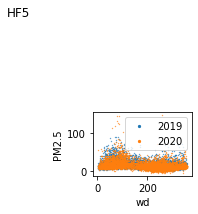

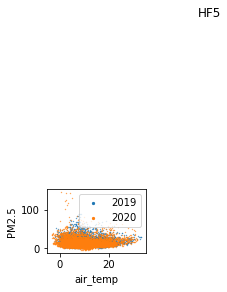

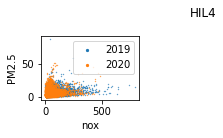

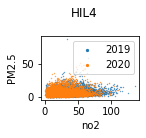

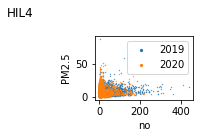

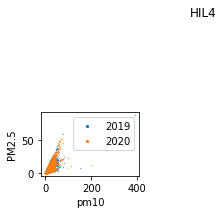

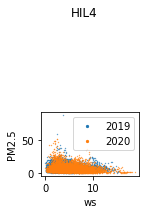

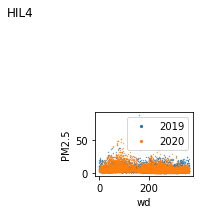

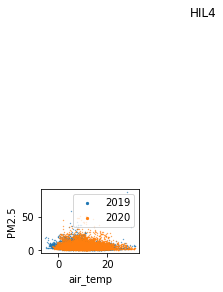

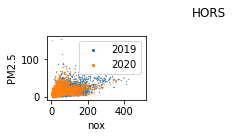

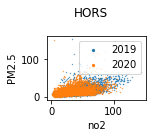

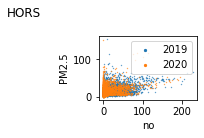

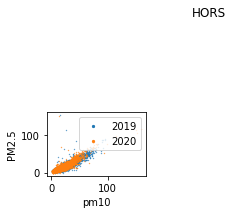

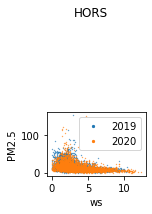

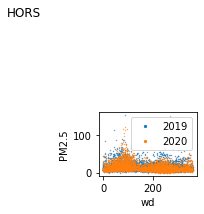

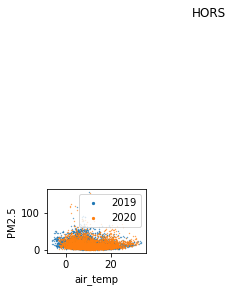

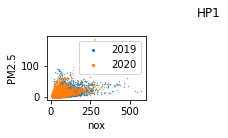

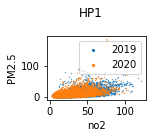

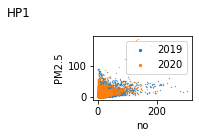

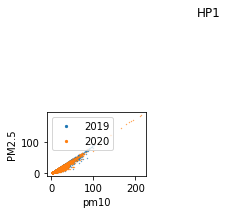

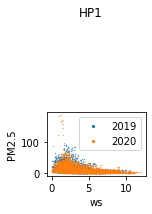

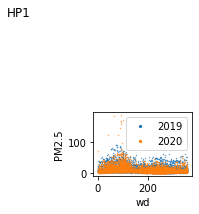

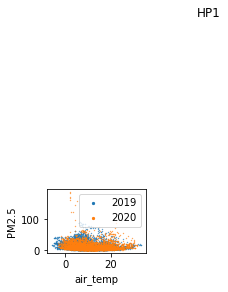

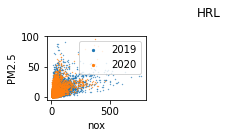

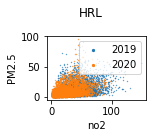

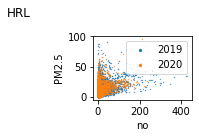

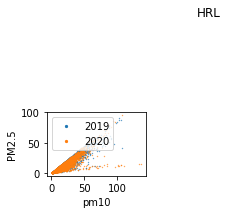

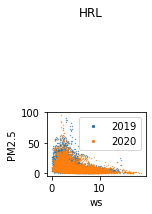

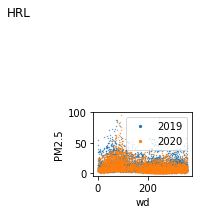

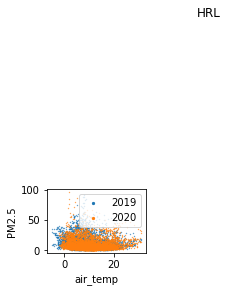

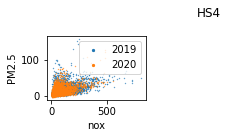

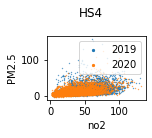

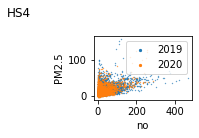

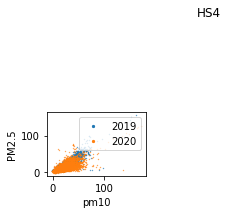

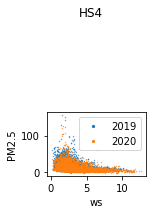

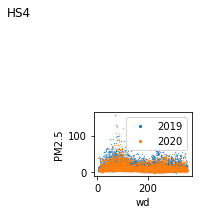

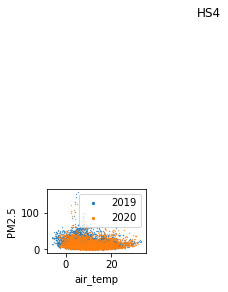

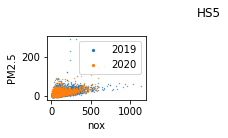

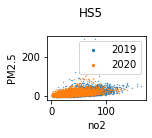

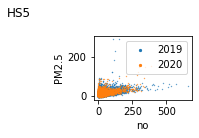

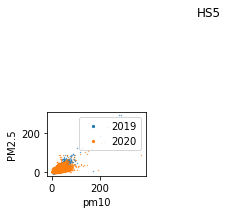

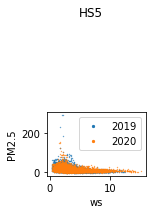

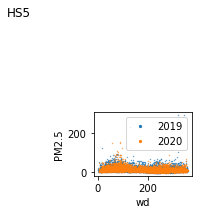

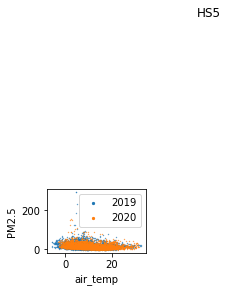

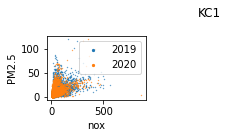

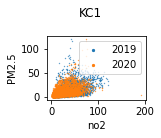

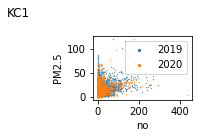

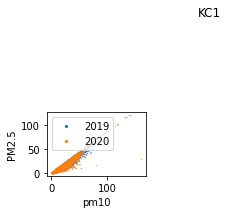

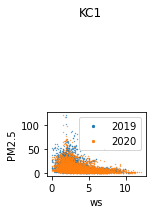

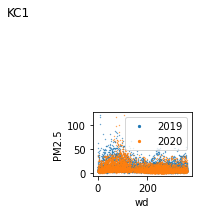

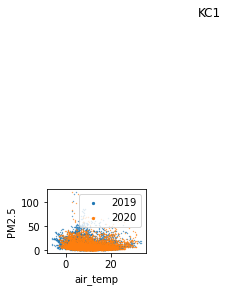

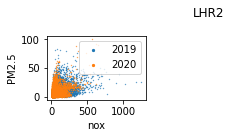

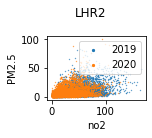

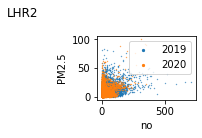

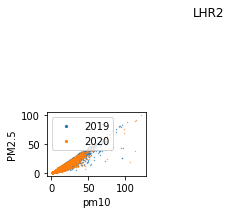

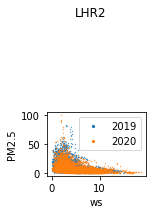

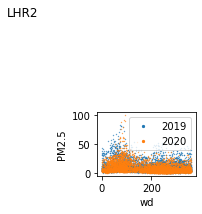

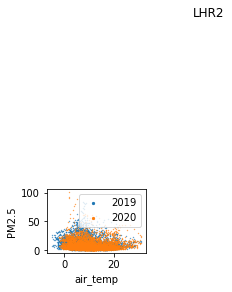

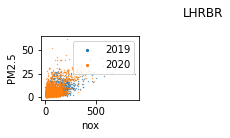

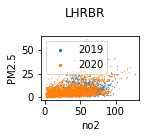

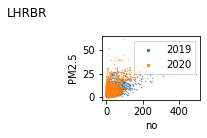

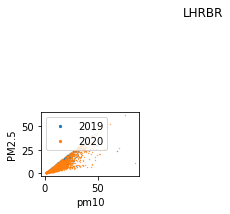

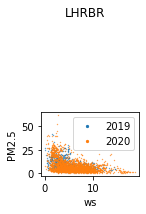

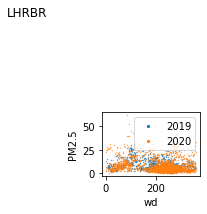

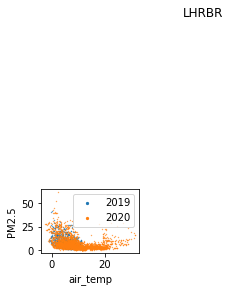

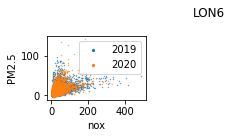

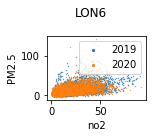

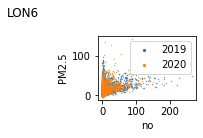

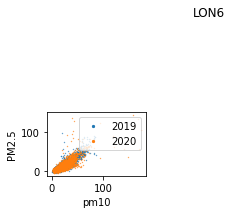

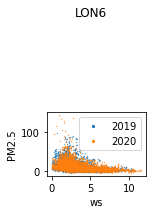

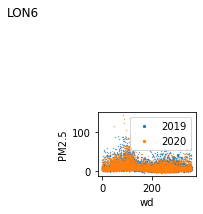

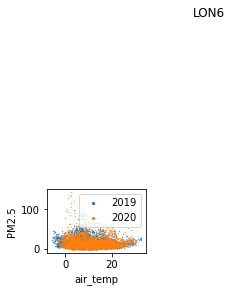

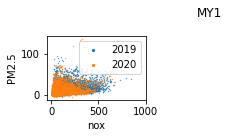

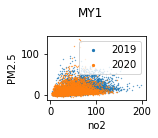

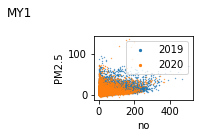

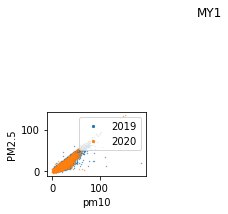

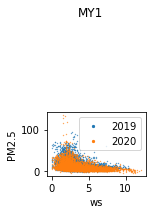

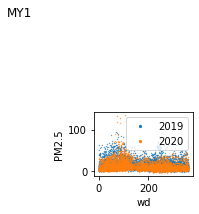

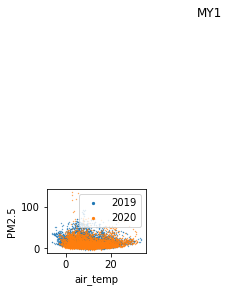

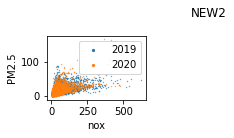

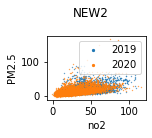

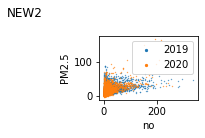

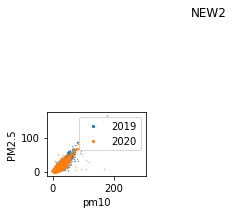

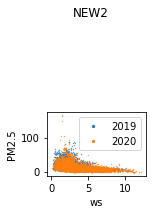

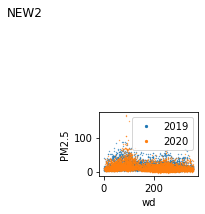

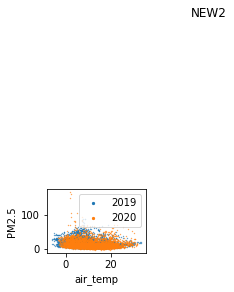

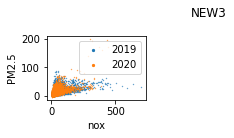

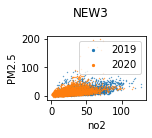

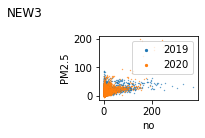

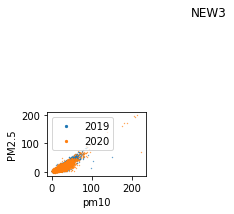

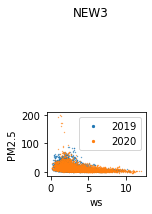

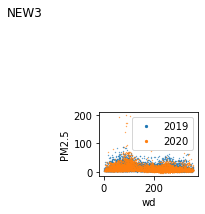

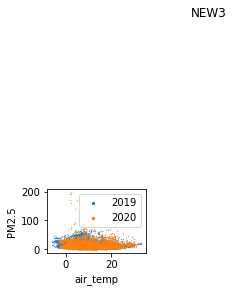

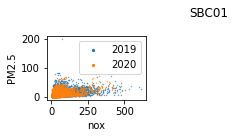

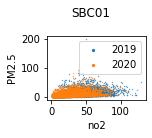

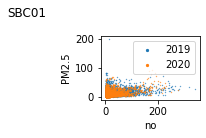

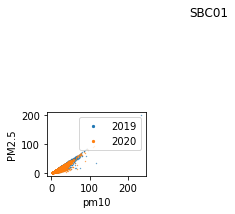

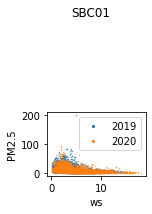

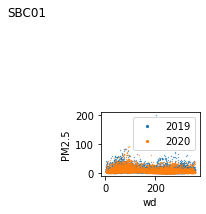

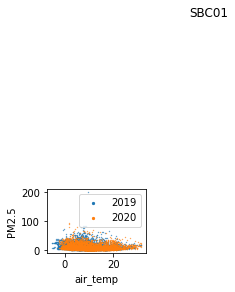

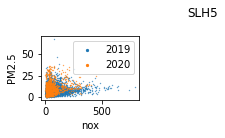

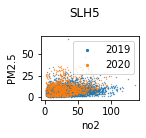

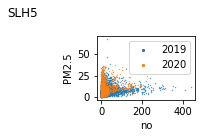

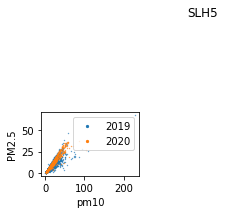

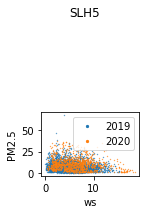

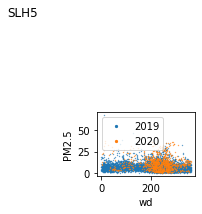

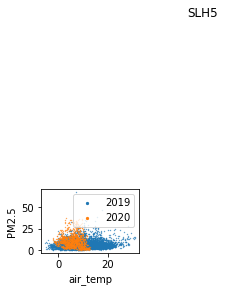

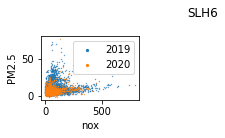

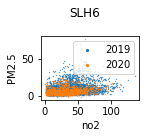

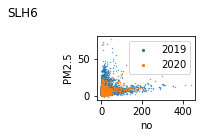

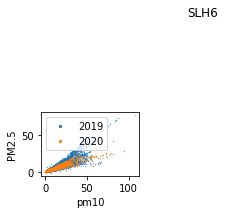

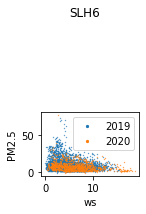

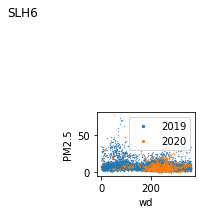

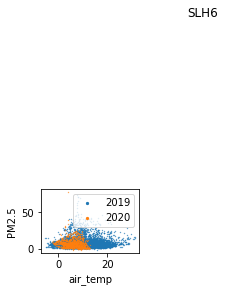

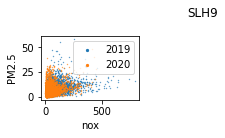

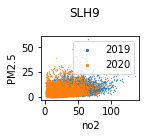

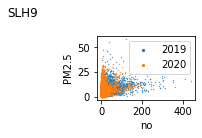

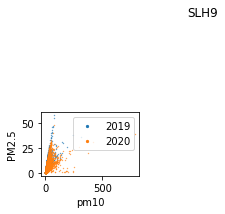

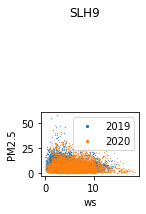

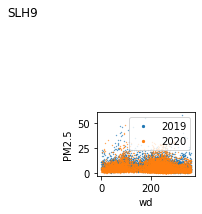

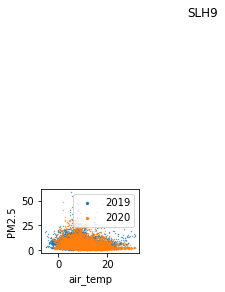

KeyError: 'SSE007'

In [134]:
list_stations = grouped_station.groups.keys()
list_stations = list(list_stations)
values = ['nox', 'no2', 'no', 'pm10', 'ws', 'wd','air_temp']
for station in list_stations:
    df_station_2019 = grouped_station_2019.get_group(station)
    df_station_2020 = grouped_station_2020.get_group(station)
    plt.figure()
    for idx, val in enumerate(values, 0):
        ax = plt.subplot(3, 3, idx + 1)
        ax.scatter(df_station_2019[val], df_station_2019['pm2.5'], label='2019', s=0.1)
        ax.scatter(df_station_2020[val], df_station_2020['pm2.5'], label='2020', s=0.1)
        ax.legend(markerscale=7)
        plt.suptitle(station)
        plt.ylabel('PM2.5')
        plt.xlabel(val)
        plt.show()

Scatter plot for all stations between  𝑃𝑀2.5  and all vaues

C:\Users\mirel\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


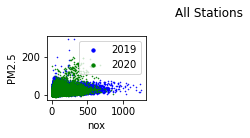

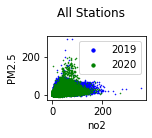

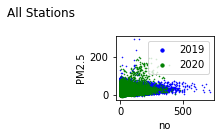

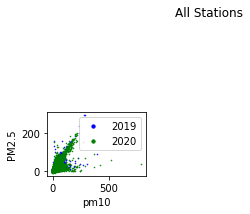

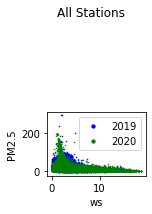

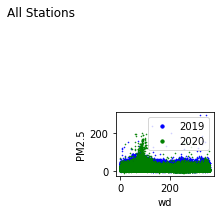

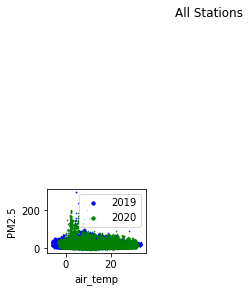

In [17]:
for idx, val in enumerate(values, 0):
    ax = plt.subplot(3, 3, idx + 1)
    ax.scatter(df_stations_2019[val], df_stations_2019['pm2.5'], label='2019', s=0.3, color='blue')
    ax.scatter(df_stations_2020[val], df_stations_2020['pm2.5'], label='2020', s=0.3, color='green')
    ax.legend(markerscale=6)
    plt.suptitle('All Stations')
    plt.ylabel('PM2.5')
    plt.xlabel(val)
    plt.show()

Difference between year 2019 and 2020

In [ ]:
for station in list_stations:
    df_station_2019 = grouped_station_2019.get_group(station)
    df_station_2020 = grouped_station_2020.get_group(station)
    plt.figure()
    ax = plt.plot
    sns.histplot(data=df_station_2019, x="pm2.5", color="blue", label="PM2.5 2019", kde=True, binwidth=1)
    sns.histplot(data=df_station_2020, x="pm2.5", color="red", label="PM2.5 2020", kde=True, binwidth=1)
    plt.suptitle(station)
    plt.show()

Data before linear regression

In [ ]:
for idx, station in enumerate(list_stations, start=0):

    df_station = grouped_station.get_group(station)

    if (idx % 5) == 0:
        plt.figure()

    ax = plt.subplot(5, 1, (idx % 5) + 1)
    ax.plot(df_station['date'], df_station['pm2.5'])
    ax.legend(['PM2.5-{}'.format(station)])
plt.show()

## 3.3 Linear Regression

Join dataframe 2019 and 2020

In [142]:
df_stations = pd.concat([df_stations_2019, df_stations_2020], sort=False)

In [143]:
# Create groups
grouped_station = df_stations.groupby('code')
list_stations = grouped_station.groups.keys()
list_stations = list(list_stations)
values = ['nox', 'no2', 'no', 'pm10', 'ws', 'wd', 'air_temp']

Calculate linear regression with all values

In [144]:
regr = linear_model.LinearRegression(fit_intercept=True)
r_2_train_dic = {}
r_2_test_dic = {}
intercept_train = {}
intercept_test = {}
coef_train = {}
coef_test = {}
for station in list_stations:
    df_station = grouped_station.get_group(station)
    msk = np.random.rand(len(df_station)) < 0.8
    train = df_station[msk]
    test = df_station[~msk]
    x_train = np.asanyarray(train[['nox', 'no2', 'no', 'pm10', 'ws', 'wd', 'air_temp']])
    y_train = np.asanyarray(train[['pm2.5']])
    model_train = regr.fit(x_train, y_train)
    y_hat_train = regr.predict(x_train)
    r_2_train = regr.score(x_train, y_train)
    r_2_train_dic[station] = round(r_2_train, 2)
    intercept_train[station] = regr.intercept_
    coef_train[station] = regr.coef_
    #print('Station:{}, R_2_train:{}'.format(station, r_2_train))
    #print('Station:{}, Coefficients:{}'.format(station, regr.coef_))
    x_test = np.asanyarray(test[['nox', 'no2', 'no', 'pm10', 'ws', 'wd', 'air_temp']])
    y_test = np.asanyarray(test[['pm2.5']])
    y_hat_test = regr.predict(x_test)
    r_2_test = regr.score(x_test, y_test)
    r_2_test_dic[station] = round(r_2_test, 2)
    #print('Station:{}, R_2_test:{}'.format(station, r_2_test))
    #print('Station:{}, R_2_train:{}, R_2_test:{}'.format(station, r_2_train, r_2_test))

# 4 Results and Discussion <a name="results"></a>

In [145]:
# Sorted Values TRAIN
r_2_train_dic = dict(sorted(r_2_train_dic.items(), key=lambda item: item[1]))
x_axis_train = list(r_2_train_dic.keys())
y_axis_train = list(r_2_train_dic.values())
# Sorted Values TEST
r_2_test_dic = dict(sorted(r_2_test_dic.items(), key=lambda item: item[1]))
x_axis_test = list(r_2_test_dic.keys())
y_axis_test = list(r_2_test_dic.values())

Plot difference between train and test $R_{2}$

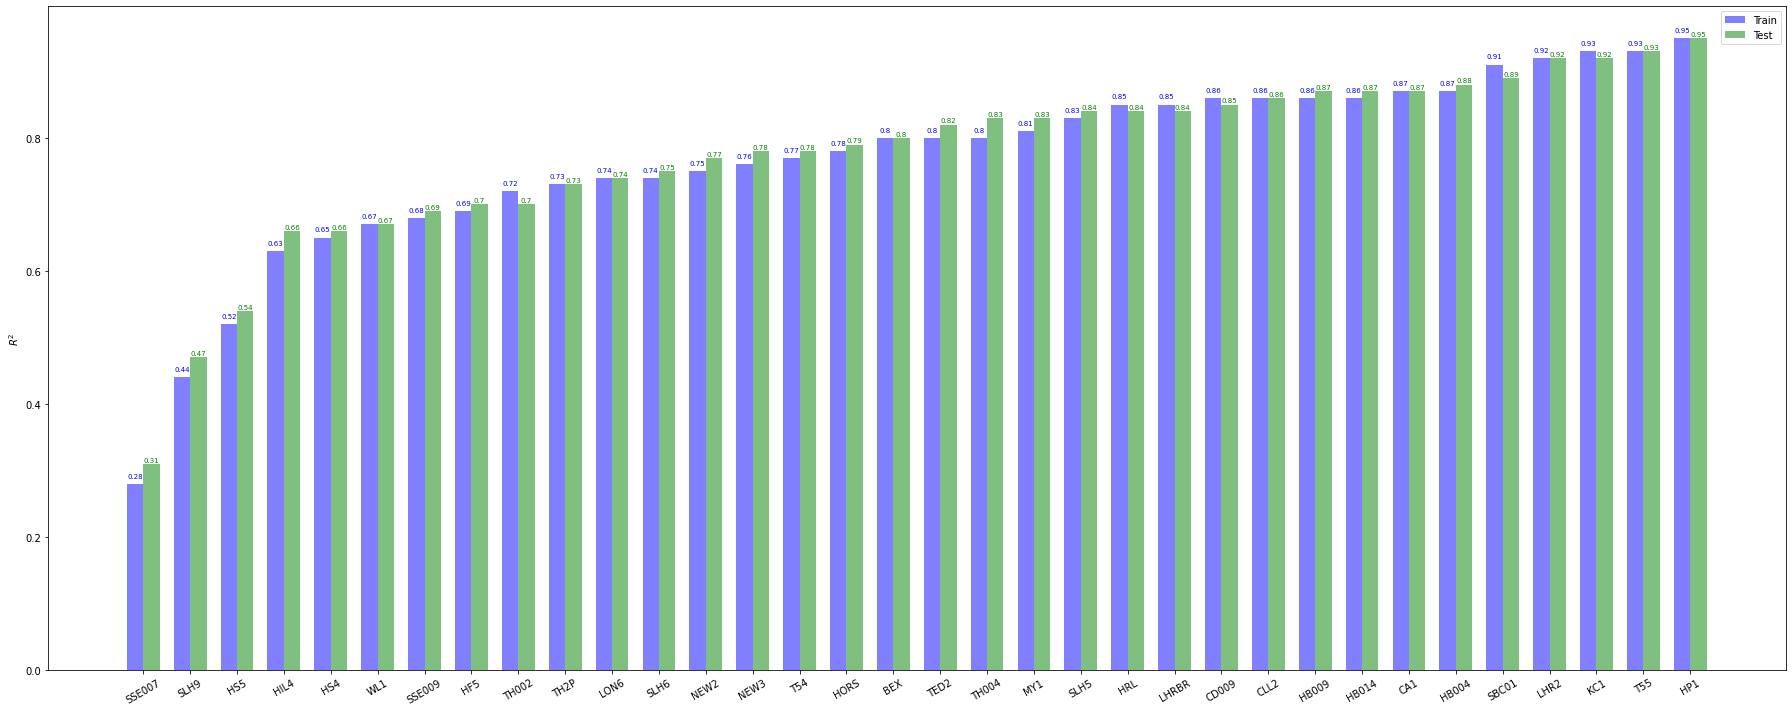

In [146]:
# Install version 3.2.4 matplotlibe for bar_label (R2 for all stations)
labels = x_axis_train
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(25,10))
ax1 = ax.bar(x - width/2, y_axis_train, width, label='Train', color='blue', alpha=0.5)
ax2 = ax.bar(x + width/2, y_axis_test, width, label='Test', color='green', alpha=0.5)
plt.xticks(rotation=30)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'$R^2$')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(ax1, padding=5, size=7, color='blue')
ax.bar_label(ax2, padding=1, size=7, color='green')
fig.tight_layout()
plt.show()

Plot coefficient of all values.

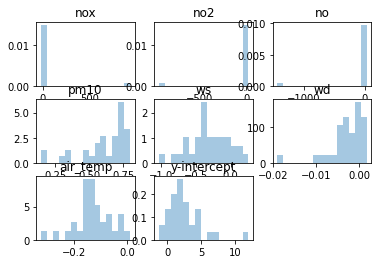

In [147]:
# Install version 3.2.4 matplotlibe for bar_label y-intercept for all stations
plt.figure()
for i, v in enumerate(values):
    ax = plt.subplot(3, 3, i+1)
    val = [coef_train[x][0, i] for x in list_stations]
    ax.hist(val, bins=15, histtype='stepfilled', alpha=0.4, density=True)
    ax.set_title(v)
ax = plt.subplot(3, 3, 8)
val = [intercept_train[x][0] for x in list_stations]
ax.hist(val, bins=15, histtype='stepfilled', alpha=0.4, density=True)
ax.set_title('y-intercept')
plt.show()

Plot $PM_{2.5}$ during the years.

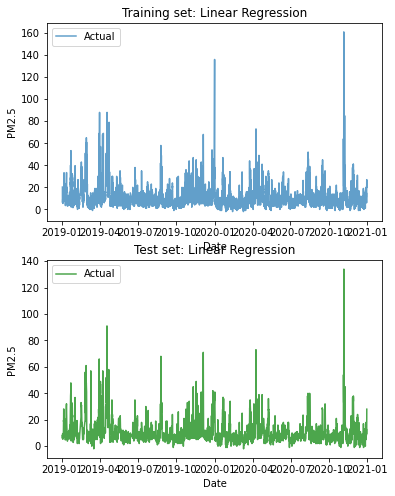

In [33]:
# Train actual and predicted and Test
fig = plt.figure(figsize=(6, 8))
ax = plt.subplot(211)
ax.plot(train['date'], train['pm2.5'], label='Actual', alpha=0.7)
ax.set_xlabel('Date')
ax.set_ylabel('PM2.5')
ax.set_title('Training set: Linear Regression')
ax.legend()

ax1 = plt.subplot(212)
ax1.plot(test['date'], test['pm2.5'], label='Actual', alpha=0.7, color='green')
ax1.set_xlabel('Date')
ax1.set_ylabel('PM2.5')
ax1.set_title('Test set: Linear Regression')
ax1.legend()
plt.show()

The results of the algorith to forecast $PM_{2.5}$

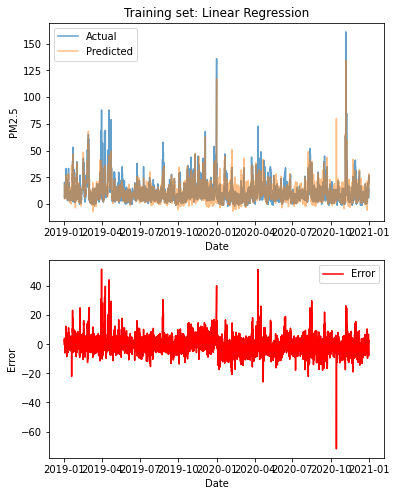

In [34]:
# Train actual and predicted
fig = plt.figure(figsize=(6, 8))
ax = plt.subplot(211)
ax.plot(train['date'], train['pm2.5'], label='Actual',  alpha=0.7)
ax.plot(train['date'], y_hat_train, label='Predicted', alpha=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('PM2.5')
ax.set_title('Training set: Linear Regression')
ax.legend()

ax1 = plt.subplot(212)
error = train['pm2.5'] - y_hat_train[:, 0]
ax1.plot(train['date'], error, color='red', label='Error')
ax1.set_xlabel('Date')
ax1.set_ylabel('Error')
ax1.legend()
plt.show()

## 4.2 Forecasting performance for station HP1

Calculate the linnear regression for station HP1

In [37]:
#Calculate for station HP1
r_2_train_HP1_dic = {}
r_2_test_HP1_dic = {}
regr = linear_model.LinearRegression(fit_intercept=True)
station_HP1 = grouped_station.get_group('HP1')
msk = np.random.rand(len(station_HP1)) < 0.8
train_HP1 = station_HP1[msk]
test_HP1 = station_HP1[~msk]
x_train_HP1 = np.asanyarray(train_HP1[['nox', 'no2', 'no', 'pm10', 'ws', 'wd', 'air_temp']])
y_train_HP1 = np.asanyarray(train_HP1[['pm2.5']])
model_train_HP1 = regr.fit(x_train_HP1, y_train_HP1)
y_hat_train_HP1 = regr.predict(x_train_HP1)
r_2_train_HP1 = regr.score(x_train_HP1, y_train_HP1)
r_2_train_HP1_dic['HP1'] = round(r_2_train_HP1, 2)
#print('R_2_train:{}'.format(r_2_train_HP1))
#print('Station:{}, Coefficients:{}'.format(station, regr.coef_))
x_test_HP1 = np.asanyarray(test_HP1[['nox', 'no2', 'no', 'pm10', 'ws', 'wd', 'air_temp']])
y_test_HP1 = np.asanyarray(test_HP1[['pm2.5']])
model_test_HP1 = regr.fit(x_test_HP1, y_test_HP1)
y_hat_test_HP1 = regr.predict(x_test_HP1)
r_2_test_HP1 = regr.score(x_test_HP1, y_test_HP1)
r_2_test_HP1_dic['HP1'] = round(r_2_test_HP1, 2)
RMSE_HP1 = mean_squared_error(y_test_HP1, y_hat_test_HP1)
#print('R_2_test:{}'.format(r_2_test_HP1))
#print('Station:{}, R_2_train:{}, R_2_test:{}'.format(station, r_2_train, r_2_test))

Plot a scatter plot with the calculate values in Linear Regression

Text(0.5, 1.0, 'Test set for station London Honor Oak Park HP1')

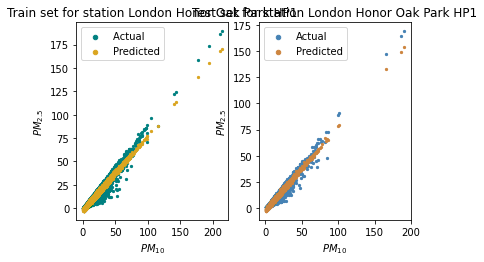

In [139]:
# Plot outputs
fig = plt.figure(figsize=(6, 8))
ax = plt.subplot(221)
ax.scatter(train_HP1['pm10'], train_HP1['pm2.5'], label='Actual ', s=5, color='teal')
ax.legend(markerscale=2)
ax.scatter(train_HP1['pm10'], y_hat_train_HP1, label='Predicted', color='goldenrod', s=5)
ax.legend(markerscale=2)
ax.set_xlabel('$PM_{10}$')
ax.set_ylabel('$PM_{2.5}$')
ax.set_title('Train set for station London Honor Oak Park HP1')

ax1 = plt.subplot(222)
ax1.scatter(test_HP1['pm10'], test_HP1['pm2.5'], label='Actual', s=5, color='steelblue')
ax1.legend(markerscale=2)
ax1.scatter(test_HP1['pm10'], y_hat_test_HP1, label='Predicted', color='peru', s=5)
ax1.legend(markerscale=2)
ax1.set_xlabel('$PM_{10}$')
ax1.set_ylabel('$PM_{2.5}$')
ax1.set_title('Test set for station London Honor Oak Park HP1')

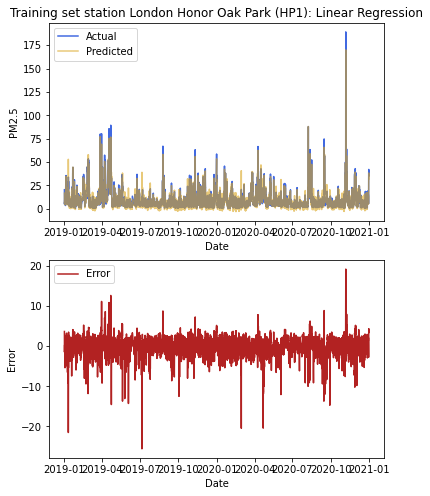

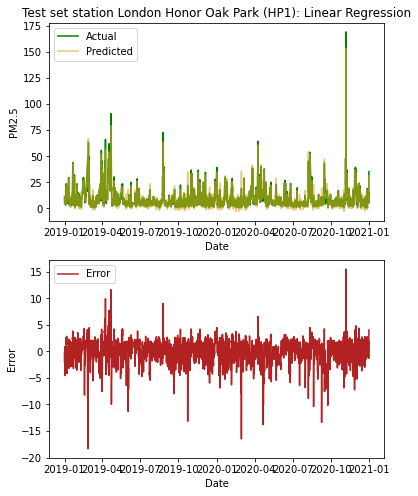

In [135]:
# Train actual and predicted
fig = plt.figure(figsize=(6, 8))
ax = plt.subplot(211)
ax.plot(train_HP1['date'], train_HP1['pm2.5'], label='Actual',  alpha=1, color='royalblue')
ax.plot(train_HP1['date'], y_hat_train_HP1, label='Predicted', alpha=0.6, color='goldenrod')
ax.set_xlabel('Date')
ax.set_ylabel('PM2.5')
ax.set_title('Training set station London Honor Oak Park (HP1): Linear Regression')
ax.legend()

ax1 = plt.subplot(212)
error_train_HP1 = train_HP1['pm2.5'] - y_hat_train_HP1[:, 0]
ax1.plot(train_HP1['date'], error_train_HP1, color='firebrick', label='Error')
ax1.set_xlabel('Date')
ax1.set_ylabel('Error')
ax.set_title('Training set station London Honor Oak Park (HP1): Linear Regression')
ax1.legend()
plt.show()
########################################################################################################################
# Test actual and predicted
fig = plt.figure(figsize=(6, 8))
ax = plt.subplot(211)
ax.plot(test_HP1['date'], test_HP1['pm2.5'], label='Actual',  alpha=1, color='green')
ax.plot(test_HP1['date'], y_hat_test_HP1, label='Predicted', alpha=0.6, color='goldenrod')
ax.set_xlabel('Date')
ax.set_ylabel('PM2.5')
ax.set_title('Test set London Honor Oak Park (HP1): Linear Regression')
ax.legend()

ax1 = plt.subplot(212)
error_test_HP1 = test_HP1['pm2.5'] - y_hat_test_HP1[:, 0]
ax1.plot(test_HP1['date'], error_test_HP1, color='firebrick', label='Error')
ax1.set_xlabel('Date')
ax1.set_ylabel('Error')
ax.set_title('Test set station London Honor Oak Park (HP1): Linear Regression')
ax1.legend()
plt.show()

## 4.3 Forecasting performance for station SSE

In [136]:
# Calculate for station SSE
r_2_train_SSE_dic = {}
r_2_test_SSE_dic = {}
regr = linear_model.LinearRegression(fit_intercept=True)
station_SSE = grouped_station.get_group('SSE007')
msk = np.random.rand(len(station_SSE)) < 0.8
train_SSE = station_SSE[msk]
test_SSE = station_SSE[~msk]
x_train_SSE = np.asanyarray(train_SSE[['nox', 'no2', 'no', 'pm10', 'ws', 'wd', 'air_temp']])
y_train_SSE = np.asanyarray(train_SSE[['pm2.5']])
model_train_SSE = regr.fit(x_train_SSE, y_train_SSE)
y_hat_train_SSE = regr.predict(x_train_SSE)
r_2_train_SSE = regr.score(x_train_SSE, y_train_SSE)
r_2_train_SSE_dic['SSE007'] = round(r_2_train_SSE, 2)
print('R_2_train:{}'.format(r_2_train_SSE))
#print('Station:{}, Coefficients:{}'.format(station, regr.coef_))
x_test_SSE = np.asanyarray(test_SSE[['nox', 'no2', 'no', 'pm10', 'ws', 'wd', 'air_temp']])
y_test_SSE = np.asanyarray(test_SSE[['pm2.5']])
model_test_SSE = regr.fit(x_test_SSE, y_test_SSE)
y_hat_test_SSE = regr.predict(x_test_SSE)
r_2_test_SSE = regr.score(x_test_SSE, y_test_SSE)
r_2_test_SSE_dic['SSE007'] = round(r_2_test_SSE, 2)

R_2_train:0.2963860964985344


Text(0.5, 1.0, 'Test set for station Slough - The Hawthorns (SSE007)')

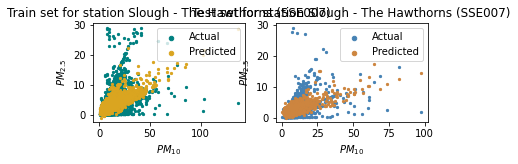

In [138]:
# Plot outputs
ax2 = plt.subplot(223)
ax2.scatter(train_SSE['pm10'], train_SSE['pm2.5'], label='Actual', s=5, color='teal')
ax2.legend(markerscale=2)
ax2.scatter(train_SSE['pm10'], y_hat_train_SSE, label='Predicted', color='goldenrod', s=5)
ax2.legend(markerscale=2)
ax2.set_xlabel('$PM_{10}$')
ax2.set_ylabel('$PM_{2.5}$')
ax2.set_title('Train set for station Slough - The Hawthorns (SSE007)')

ax3 = plt.subplot(224)
ax3.scatter(test_SSE['pm10'], test_SSE['pm2.5'], label='Actual', s=5, color='steelblue')
ax3.legend(markerscale=2)
ax3.scatter(test_SSE['pm10'], y_hat_test_SSE, label='Predicted', color='peru', s=5)
ax3.legend(markerscale=2)
ax3.set_xlabel('$PM_{10}$')
ax3.set_ylabel('$PM_{2.5}$')
ax3.set_title('Test set for station Slough - The Hawthorns (SSE007)')

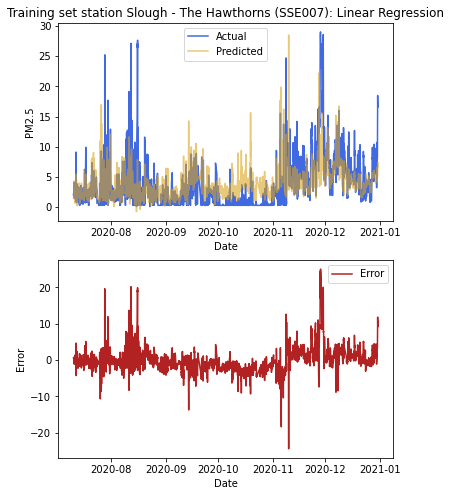

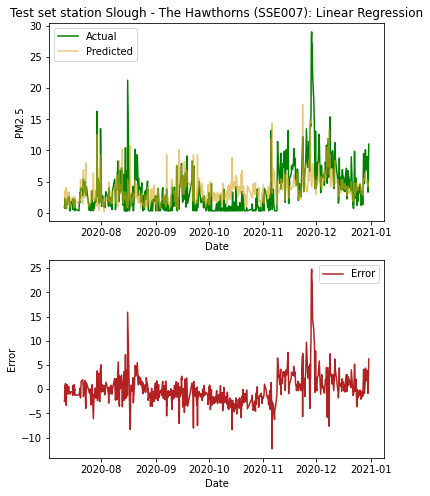

In [140]:
# Train actual and predicted
fig = plt.figure(figsize=(6, 8))
ax = plt.subplot(211)
ax.plot(train_SSE['date'], train_SSE['pm2.5'], label='Actual',  alpha=1, color='royalblue')
ax.plot(train_SSE['date'], y_hat_train_SSE, label='Predicted', alpha=0.6, color='goldenrod')
ax.set_xlabel('Date')
ax.set_ylabel('PM2.5')
ax.set_title('Training set station Slough - The Hawthorns (SSE007): Linear Regression')
ax.legend()

ax1 = plt.subplot(212)
error_train_SSE = train_SSE['pm2.5'] - y_hat_train_SSE[:, 0]
ax1.plot(train_SSE['date'], error_train_SSE, color='firebrick', label='Error')
ax1.set_xlabel('Date')
ax1.set_ylabel('Error')
ax1.legend()
plt.show()
########################################################################################################################
# Test actual and predicted
fig = plt.figure(figsize=(6, 8))
ax = plt.subplot(211)
ax.plot(test_SSE['date'], test_SSE['pm2.5'], label='Actual',  alpha=1, color='green')
ax.plot(test_SSE['date'], y_hat_test_SSE, label='Predicted', alpha=0.6, color='goldenrod')
ax.set_xlabel('Date')
ax.set_ylabel('PM2.5')
ax.set_title('Test set station Slough - The Hawthorns (SSE007): Linear Regression')
ax.legend()

ax1 = plt.subplot(212)
error_test_SSE = test_SSE['pm2.5'] - y_hat_test_SSE[:, 0]
ax1.plot(test_SSE['date'], error_test_SSE, color='firebrick', label='Error')
ax1.set_xlabel('Date')
ax1.set_ylabel('Error')
ax1.legend()
plt.show()


Table shows the results for lineal regression algorithm performs compared with the worst and better station.

<img src='Results.PNG' width="700" height="500" align="center">

## 5. Conclusion<a name="conclusion"></a>

In this work, the proposed machine learning models to analyse the air pollution on the City of London is presented. There are 150 air pollution stations that recorded in London Air Quality, however,  the project only used 32 stations with data from 2019 to 2020 because these stations has the values that need the model to learn and generate a model. The particular matter 𝑃𝑀2.5 forecast are done using linear regression. The results shows that $PM_{2.5}$ can be forcast with optmistic results and this can help to have a more amount of data to future studies.